In [10]:
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix, hstack
from scipy.io import mmread, mmwrite
import matplotlib.pyplot as plt
from scipy import sparse
import plotly.express as px
import random
import math
import seaborn as sns
from plotly import graph_objects as go
import matplotlib.patches as patches
from tqdm.notebook import tqdm

v5 matrices at LAD level are binary and for GB. (they are named Uk but for GB)

MSOA matrices

In [11]:
A_MSOA_list = []

for year in range(2005,2011):
    # does 2005-2010 inclusive
    filepath = "A_for_" + str(year) + "_binary_MSOA_UK.mtx" # file name to read in 
    A = mmread(filepath).todense()[0:8483, 0:8483] # don't want the Northern Ireland MSOAs
    
    A_MSOA_list.append(A)

LAD matrices

In [12]:
A_LAD_list = []
year_list = []

for year in range(2005,2011):
    # does 2005-2010 inclusive
    filepath = "A_LAD_" + str(year) + "_UK_v5.mtx" # file name to read in 
    A = mmread(filepath).todense() # temporary
    
    year_list.append(year)
    A_LAD_list.append(A)

Region matrices

In [13]:
A_Reg_list = []

for year in range(2005,2011):
    # does 2005-2010 inclusive
    filepath = "A_Reg_" + str(year) + "_GB.mtx" # file name to read in 
    A = mmread(filepath).todense() # temporary
    
    A_Reg_list.append(A)

### Z scores

In [14]:
T = len(year_list)

MSOA matrices

In [15]:
n_MSOA = A_MSOA_list[0].shape[0]

Zscores_all_MSOA = np.zeros((T, n_MSOA, n_MSOA))
zero_std_MSOA = 0

for i in tqdm(range(n_MSOA)): # wrap in tqdm for progress bar
    for j in range(n_MSOA):
        Aij_values = [] 
        # collect Aij values for all years
        for t in range(len(year_list)):
            Aij_values.append(A_MSOA_list[t][i,j])
        # calculate mean and standard deviation
        mean_Aij = np.mean(Aij_values)
        stddev_Aij = np.std(Aij_values)

        # calculate Zscores
        Zscores_Aij = []
        for k in Aij_values:
            if stddev_Aij == 0:
                Zscores_Aij.append(0)
            else:
                Zscores_Aij.append((k - mean_Aij) / stddev_Aij)
        Zscores_all_MSOA[:,i,j] = Zscores_Aij
    
        # find out if LAD-LAD pair never share an edge
        for k in Aij_values:
            if (stddev_Aij == 0) & (mean_Aij == 0):
                zero_std_MSOA += 1
            else:
                pass

  0%|          | 0/8483 [00:00<?, ?it/s]

In [16]:
(zero_std_MSOA) / (T*n_MSOA*n_MSOA)


0.998032692271535

In [21]:
1 - 0.998032692271535

0.0019673077284649843

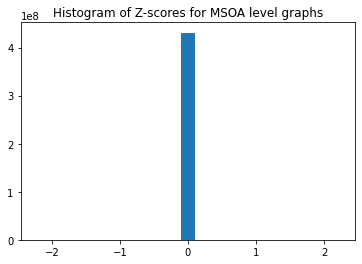

In [17]:
# Reshape the 3D array to a 1D array
Zscores_all_MSOA_flatten = Zscores_all_MSOA.flatten()

plt.hist(Zscores_all_MSOA_flatten, bins=21)
plt.title("Histogram of Z-scores for MSOA level graphs")
plt.savefig("Histogram_of_Z-scores_for_MSOA_level_graphs.png")

LAD matrices

In [15]:
n_LAD = A_LAD_list[0].shape[0]

Zscores_all_LAD = np.zeros((T, n_LAD, n_LAD))
zero_std_LAD = 0

for i in tqdm(range(n_LAD)): # wrap in tqdm for progress bar
    for j in range(n_LAD):
        Aij_values = [] 
        # collect Aij values for all years
        for t in range(len(year_list)):
            Aij_values.append(A_LAD_list[t][i,j])
        # calculate mean and standard deviation
        mean_Aij = np.mean(Aij_values)
        stddev_Aij = np.std(Aij_values)

        # calculate Zscores
        Zscores_Aij = []
        for k in Aij_values:
            if stddev_Aij == 0:
                Zscores_Aij.append(0)
            else:
                Zscores_Aij.append((k - mean_Aij) / stddev_Aij)
        Zscores_all_LAD[:,i,j] = Zscores_Aij
    
        # find out if LAD-LAD pair never share an edge
        for k in Aij_values:
            if (stddev_Aij == 0) & (mean_Aij == 0):
                zero_std_LAD += 1
            else:
                pass

  0%|          | 0/380 [00:00<?, ?it/s]

In [16]:
(zero_std_LAD) / (T*n_LAD*n_LAD)

# 59% of LAD-LAD pairs never share an edge

0.5903808864265928

In [22]:
1 - 0.5903808864265928

0.4096191135734072

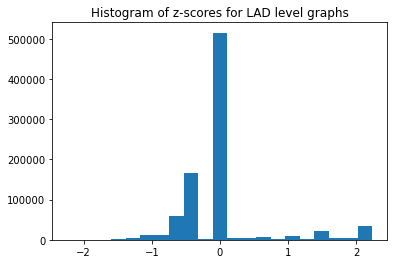

In [30]:
# Reshape the 3D array to a 1D array
Zscores_all_LAD_flatten = Zscores_all_LAD.flatten()

plt.hist(Zscores_all_LAD_flatten, bins=21)
plt.title("Histogram of z-scores for LAD level graphs")
plt.savefig("Histogram_of_z-scores_for_LAD_level_graphs.png")

Region matrices

In [23]:
n_Reg = A_Reg_list[0].shape[0]

Zscores_all_Reg = np.zeros((T, n_Reg, n_Reg))

zero_std_Reg = 0

for i in tqdm(range(n_Reg)): # wrap in tqdm for progress bar
    for j in range(n_Reg):
        Aij_values = [] 
        for t in range(len(year_list)):
            Aij_values.append(A_Reg_list[t][i,j])
        mean_Aij = np.mean(Aij_values)
        stddev_Aij = np.std(Aij_values)
        Zscores_Aij = []
        for k in Aij_values:
            if stddev_Aij == 0:
                Zscores_Aij.append(0)
            else:
                Zscores_Aij.append((k - mean_Aij) / stddev_Aij)
        Zscores_all_Reg[:,i,j] = Zscores_Aij

        # find out if Reg-Reg pair never share an edge
        for k in Aij_values:
            if (stddev_Aij == 0) & (mean_Aij == 0):
                zero_std_Reg += 1
            else:
                pass

  0%|          | 0/11 [00:00<?, ?it/s]

In [25]:
(zero_std_Reg) / (T*n_Reg*n_Reg)


0.0

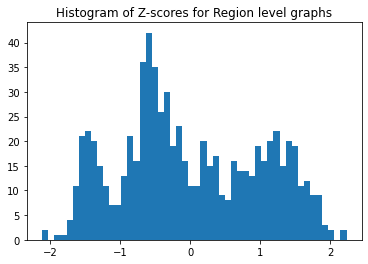

In [19]:
# Reshape the 3D array to a 1D array
Zscores_all_Reg_flatten = Zscores_all_Reg.flatten()

plt.hist(Zscores_all_Reg_flatten, bins=50)
plt.title("Histogram of Z-scores for Region level graphs")
plt.savefig("Histogram_of_Z-scores_for_Reg_level_graphs.png")

In [20]:
# make a pandas df of (zero_std_MSOA) / (T*n_MSOA*n_MSOA) 

nonRelsdf = pd.DataFrame(columns = ["Level", "Proportion pairs in graphs that never make a connection"])
nonRelsdf.loc[0] = ["MSOA", (zero_std_MSOA) / (T*n_MSOA*n_MSOA)]
nonRelsdf.loc[1] = ["LAD", (zero_std_LAD) / (T*n_LAD*n_LAD)]
nonRelsdf.loc[2] = ["Region", (zero_std_Reg) / (T*n_Reg*n_Reg)]

nonRelsdf

NameError: name 'zero_std_MSOA' is not defined